# MICROSOFT MOVIES ANALYSIS

## Business Understanding
### *Introduction*
Microsoft has decided to venture into the movie industry by establishing a new movie studio. However, they lack expertise in creating films and are uncertain about the types of movies that are currently performing well at the box office. To make informed decisions about the content they should produce, they need insights into the most successful genres in the film market.

### *Problem Statement*:
Microsoft's new movie studio lacks knowledge about the current film market trends and successful genres. They need to explore the types of films that are performing the best at the box office to guide their decision-making process and determine what kind of movies they should create.

### *Main Objective* :
The main objective is to identify the top-performing film genres at the box office and provide actionable insights to Microsoft's new movie studio head. These insights will help them decide what types of films to create to maximize their chances of success in the movie industry.

### *Specific Objective* :

* Analyze the box office performance of different film genres.
* Identify the genres that have been consistently successful over a specific time period.
* Evaluate audience preferences and market demand for various film genres.
* Provide actionable recommendations to the head of Microsoft's new movie studio based on the findings.

### Data Understanding

The data sources for this analysis will be pulled from the following files:

####  files involved.

* **Source**: This dataset comes from: <a href="https://www.boxofficemojo.com/">box office Mojo</a>,<a href="https://www.rottentomatoes.com/">Rotten tomatoes</a>,<a href="https://www.themoviedb.org/">The movie DB</a>,<a href="https://www.the-numbers.com/">The Numbers</a>
1. `bom.movie_gross.csv`
* **Contents**: It contains data of :the title of movies released plus the studio that released it,plus domestic gross and foreign gross.
* **Format**: CSV data, where each row contains a movie title, studio, domestic_gross,foereign_gross and year
2. `imdb.title.basics`
* **Contents**: It contains data of : movie id, movie title, start year ,runtime minutes ,genres
3. `imdb title.ratings`
* **Contents**: It contains data of : movie id,average ratings , numvotes.

### Setup

In the cell below we import the relevant libraries, open up the CSV file as a dataframe called `df`, and convert cells containing " " ,into cells containing `NaN` because ," " ,was used to represent missing data in the original dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store the loaded DataFrames
dataframes = {}

# List of file names
file_names = ['bom.movie_gross.csv.gz', 'imdb.title.basics.csv.gz', 'imdb.title.ratings.csv.gz']

try:
    # Open and load each file into a DataFrame
    for file_name in file_names:
        dataframe = pd.read_csv(file_name)
        dataframe.replace(" ", np.nan, inplace=True)
        dataframes[file_name] = dataframe
        print(f'Successfully loaded {file_name}')

    # Process the DataFrames
    for file_name, dataframe in dataframes.items():
        # Perform operations on the DataFrame
        print(f'File: {file_name}')
        print(dataframe.head())

except FileNotFoundError as e:
    print(f'Error opening file: {str(e)}')

Successfully loaded bom.movie_gross.csv.gz
Successfully loaded imdb.title.basics.csv.gz
Successfully loaded imdb.title.ratings.csv.gz
File: bom.movie_gross.csv.gz
                                         title studio  domestic_gross   
0                                  Toy Story 3     BV     415000000.0  \
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
File: imdb.title.basics.csv.gz
      tconst                    primary_title              original_title   
0  tt0063540                        Sunghursh                   Sunghursh  \
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek

## Drop Rows with Missing Values from all the tables

In [5]:
  # Check for columns with missing data
for file_name, dataframe in dataframes.items():
     print(f'File: {file_name}')
     print(dataframe.info())
#checking for the columns with missing data.

File: bom.movie_gross.csv.gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
File: imdb.title.basics.csv.gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres

Modify `dataframe` so that it only contains rows where is not missing (i.e. is not NaN).

 `dataframe` should still have same, but fewer rows.

In [6]:


 # Remove rows with missing data from each DataFrame
for file_name, dataframe in dataframes.items():
    print(f'File: {file_name}')
    dataframe.dropna(inplace=True)
    print(dataframe.head())

File: bom.movie_gross.csv.gz
                                         title studio  domestic_gross   
0                                  Toy Story 3     BV     415000000.0  \
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
File: imdb.title.basics.csv.gz
      tconst                    primary_title              original_title   
0  tt0063540                        Sunghursh                   Sunghursh  \
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
4  tt0100275         The Wandering Soap Opera    

the code below selects file 1 and file 2, merges the title columns, identify the genre of each movie, groups them together and calulates the genre gross sum(domestic gross +foreign gross)

In [7]:
# Select required columns from file 1
file1 = dataframes['bom.movie_gross.csv.gz']
file1_selected = file1[['title', 'domestic_gross', 'foreign_gross']]

# Convert 'domestic_gross' and 'foreign_gross' columns to numeric
file1_selected.loc[:, 'domestic_gross'] = pd.to_numeric(file1_selected['domestic_gross'], errors='coerce')
file1_selected.loc[:, 'foreign_gross'] = pd.to_numeric(file1_selected['foreign_gross'], errors='coerce')
# Select required columns from file 2
file2 = dataframes['imdb.title.basics.csv.gz']
file2_selected = file2[['genres', 'tconst', 'primary_title']]

# Merge data from file 1 and file 2 based on matching titles
merged_data = pd.merge(file1_selected, file2_selected, left_on='title', right_on='primary_title', how='inner')

# Calculate sum of domestic and foreign gross by genre
genre_gross_sum = merged_data.groupby('genres')[['domestic_gross', 'foreign_gross']].sum().reset_index()
genre_gross_sum

,genres,domestic_gross,foreign_gross
0,Action,1.878405e+08,369299999.0
1,"Action,Adventure",3.650000e+04,4047000.0
2,"Action,Adventure,Animation",2.168615e+09,4269500000.0
3,"Action,Adventure,Biography",2.402290e+08,588100000.0
4,"Action,Adventure,Comedy",3.170914e+09,6494200000.0
...,...,...,...
265,"Romance,Sci-Fi,Thriller",6.250000e+07,65400000.0
266,"Romance,Thriller",5.473000e+05,13121000.0
267,Sci-Fi,4.126000e+08,409300000.0
268,Thriller,3.385590e+08,572302300.0


### Data visualization
graph below  compares the domestic gross genre amount generated by each genre.

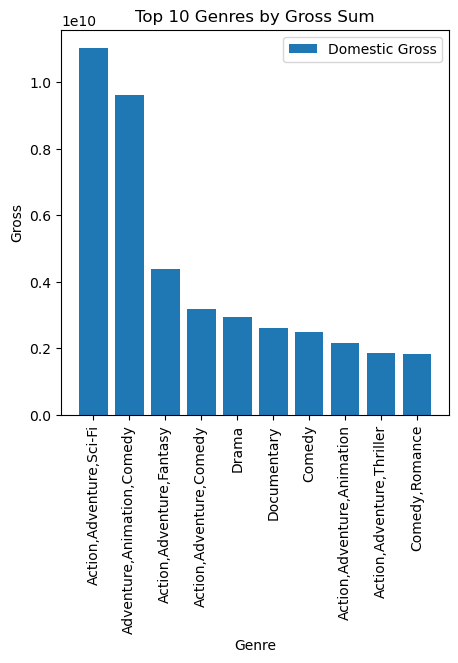

In [9]:

# Select the top 10 genres based on the genre_gross_sum
top_10_genres = genre_gross_sum.nlargest(10, 'domestic_gross')

# Plot the top 10 genres
plt.figure(figsize=(8, 5))
plt.bar(top_10_genres['genres'], top_10_genres['domestic_gross'], label='Domestic Gross')
#plt.bar(top_10_genres['genres'], top_10_genres['foreign_gross'], label='Foreign Gross')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Top 10 Genres by Gross Sum')
plt.xticks(rotation= 90)

# Add legend
plt.legend()

# Show the plot
plt.show()


graph below  compares the foreign gross genre amount generated by each genre.

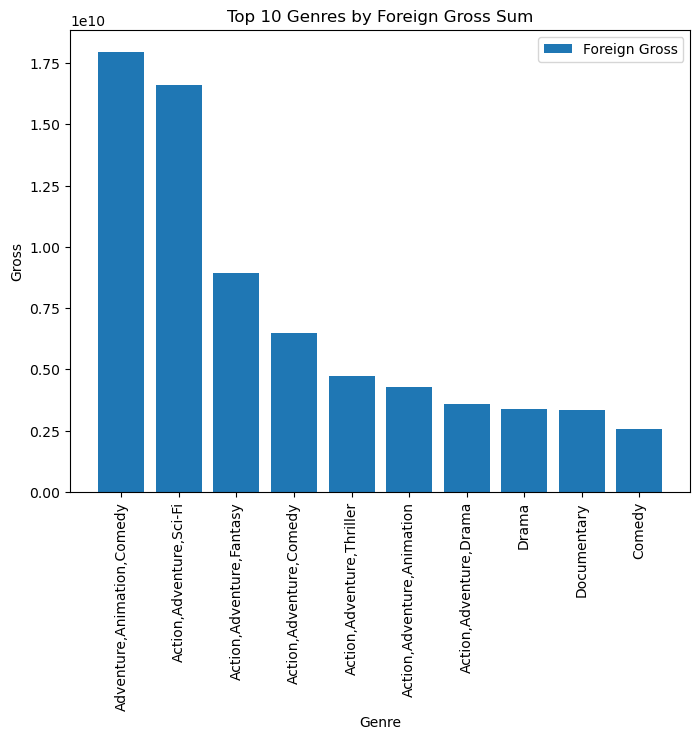

In [10]:

# Convert 'foreign_gross' column to numeric
genre_gross_sum['foreign_gross'] = pd.to_numeric(genre_gross_sum['foreign_gross'], errors='coerce')

# Select the top 10 genres based on the genre_gross_sum
top_10_genres = genre_gross_sum.nlargest(10, 'foreign_gross')

# Plot the top 10 genres
plt.figure(figsize=(8, 6))
plt.bar(top_10_genres['genres'], top_10_genres['foreign_gross'], label='Foreign Gross')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Top 10 Genres by Foreign Gross Sum')
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()



In this code, we first select the 'tconst' and 'average_rating' columns from file 3. Then, we merge the selected columns from file 2 and file 3 based on the matching 'tconst' values. Next, we calculate the average rating for each genre using the grouped data. The genres are then sorted based on the average rating in descending order. Finally, we plot the genres on the x-axis and the average ratings on the y-axis using a bar chart.

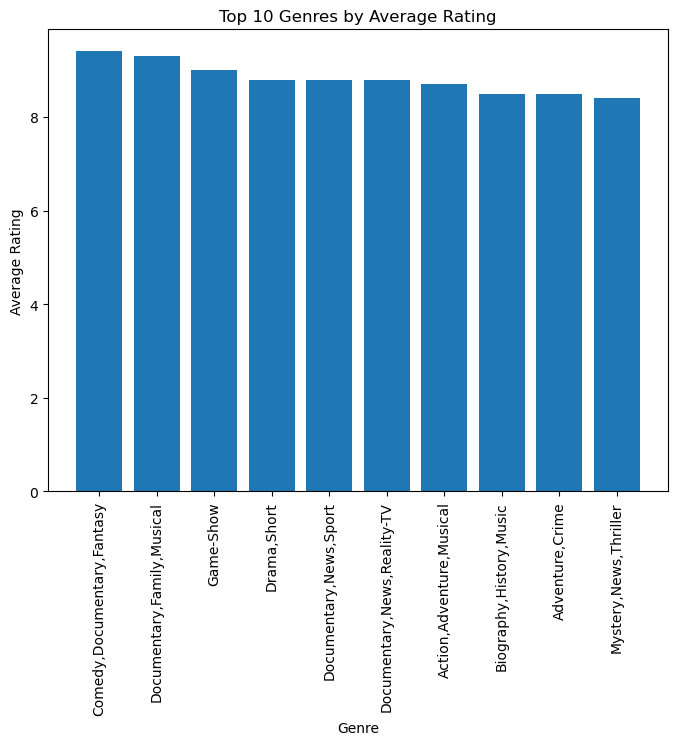

In [11]:
# Select required columns from file 3
file3 = dataframes['imdb.title.ratings.csv.gz']
file3_selected = file3[['tconst', 'averagerating']]

# Merge data from file 2 and file 3 based on matching tconst
merged_data = pd.merge(file2_selected, file3_selected, on='tconst', how='inner')

# Calculate average rating by genre
genre_avg_rating = merged_data.groupby('genres')['averagerating'].mean().reset_index()

# Sort genres by average rating in descending order
sorted_genres = genre_avg_rating.sort_values('averagerating', ascending=False)

# Select the top 10 genres based on average rating
top_10_genres = sorted_genres.nlargest(10, 'averagerating')

# Plot the top 10 genres and average ratings
plt.figure(figsize=(8, 6))
plt.bar(top_10_genres['genres'], top_10_genres['averagerating'])

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.xticks(rotation=90)

# Show the plot
plt.show()




The code merges file2 and file3 based on 'tconst', then merges the resulting data with file1 based on the title. It then groups the data by genres and calculates the total numvotes for each genre. Finally, it plots a bar graph comparing the top 10 genres and the number of votes.

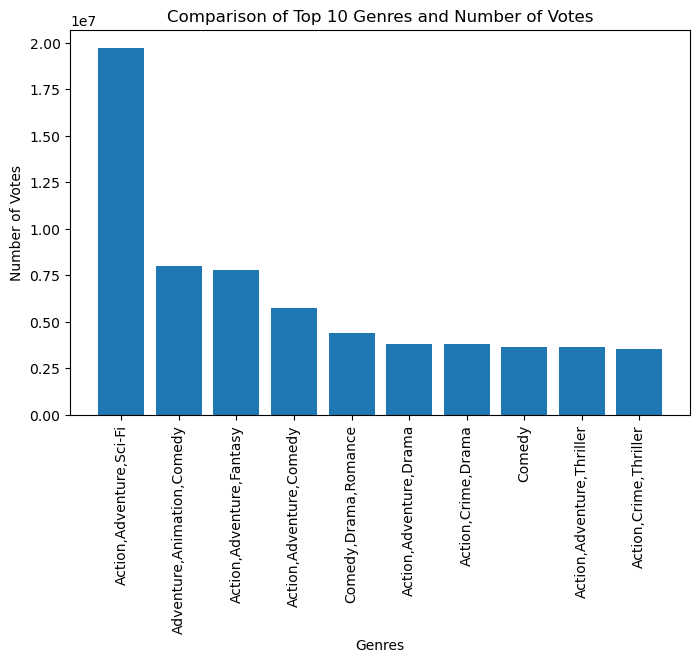

In [12]:
# Merge file2 and file3 based on tconst
merged_data = pd.merge(file2, file3, on='tconst', how='inner')

# Merge merged_data with file1 based on title
merged_data = pd.merge(merged_data, file1, left_on='primary_title', right_on='title', how='inner')

# Group by genres and calculate the total numvotes
genre_numvotes = merged_data.groupby('genres')['numvotes'].sum().nlargest(10)

# Plot the comparison of top 10 genres and numvotes
plt.figure(figsize=(8, 5))
plt.bar(genre_numvotes.index, genre_numvotes.values)
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Comparison of Top 10 Genres and Number of Votes')
plt.xticks(rotation=90)
plt.show()


### CONCLUSION

1. ## Did we have the right data ?
    YES : THE AVAILABLE DATA HELPED SOLVE THE TASK.
    HOW?
     I was able to: a. group the movies according to the particular genre
                    b. calculate the domestic gross and foreign gross generated by each genre and compare
                    c. identify the genre with the highest average ratingsand compare to the number of votes.
2. ## Solution to the task:
   from the analysis, a combination of action,adventure and sci-fi  genres have proved to 
    * a. generate a high domestic and foreign gross.
    * b. have higher ratings than the other genres
    * c. attain a higher numvotes count than other genres.

